In [11]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [57]:
def read_dataframes():    
    """
    >>> a = dict(x=1, y=2)
    >>> sorted(a.items())
    [('x', 1), ('y', 2)]
    """
    demographics = pd.read_csv("DEMOGRAPHICS.csv")
    lead_death_cause = pd.read_csv("LEADINGCAUSESOFDEATH.csv")
    birth_death_measure = pd.read_csv("MEASURESOFBIRTHANDDEATH.csv")
    risk_factors = pd.read_csv("RISKFACTORSANDACCESSTOCARE.csv")
    vulnerable_pops = pd.read_csv("VUNERABLEPOPSANDENVHEALTH.csv")
    return demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops

In [58]:
read_dataframes

<function __main__.read_dataframes()>

In [59]:
def birth_death_ratio(df, df2):
   
    df1 = df[["CHSI_County_Name", "CHSI_State_Name", "White", "Black", "Native_American", "Asian", "Hispanic", "Poverty", "Population_Size"]]
    df_1 = df1[df1["Poverty"]>=0].copy()
    df_1['Others'] = df_1['Native_American']+df_1['Asian']
    df_1 = df_1.drop(["Native_American", "Asian"], axis=1)
    birth_death = df2[["CHSI_County_Name", "CHSI_State_Name", "Total_Births", "Total_Deaths"]].copy()
    birth_death = birth_death.loc[(birth_death["Total_Births"] >= 0) & (birth_death["Total_Deaths"] >= 0)]
    birth_death["birth_death_ratio"] = birth_death['Total_Deaths']/birth_death['Total_Births']*100
    data = pd.merge(df_1, birth_death, on = ['CHSI_County_Name', 'CHSI_State_Name'])
    pd.set_option('display.max_columns', None)
    print(data.sort_values(by = 'Poverty',ascending=False).head())

    dfa = df_1.groupby(["CHSI_State_Name"], as_index=False).agg(
        {"White": "mean", "Black": "mean", "Others": "mean", "Hispanic": "mean", "Poverty": "mean"})
    dfb = birth_death.groupby(["CHSI_State_Name"], as_index=False).agg({"Total_Births": "mean", "Total_Deaths": "mean"})
    final_df = pd.merge(dfa, dfb, on="CHSI_State_Name")
    final_df = final_df.round(2)
    final_df = final_df.sort_values(by=["Poverty"], ascending=False)
    print(final_df.head())

    plt.subplot(2, 1, 1)
    plt.scatter(x=data['Poverty'], y=data["White"], color="DarkGreen", label="White")
    plt.scatter(x=data['Poverty'], y=data["Black"], color="DarkBlue", label="Black")
    plt.scatter(x=data['Poverty'], y=data["Others"], color="Red", label="Others")
    plt.scatter(x=data['Poverty'], y=data["Hispanic"], color="Orange", label="Hispanic")
    plt.xlabel("Poverty")
    plt.ylabel("Race-wise Pop")
    plt.legend(loc="upper right", fontsize="x-small")
    plt.title("County & Race-wise Poverty")
    plt.grid(linewidth=0.5, color = "grey")

    plt.subplot(2, 1, 2)
    plt.scatter(x=final_df['Poverty'], y=final_df["White"], color="DarkGreen", label="White")
    plt.scatter(x=final_df['Poverty'], y=final_df["Black"], color="DarkBlue", label="Black")
    plt.scatter(x=final_df['Poverty'], y=final_df["Others"], color="Red", label="Others")
    plt.scatter(x=final_df['Poverty'], y=final_df["Hispanic"], color="Orange", label="Hispanic")
    plt.xlabel("Poverty")
    plt.ylabel("Race-wise Pop")
    plt.legend(loc="upper right", fontsize="x-small")
    plt.grid(linewidth=0.5, color="grey")
    plt.title("State & Race-wise Poverty")
    plt.show()

     CHSI_County_Name CHSI_State_Name  White  Black  Hispanic  Poverty  \
2732            Starr           Texas   98.6    0.5      97.5     36.2   
2413          Shannon    South Dakota    6.7    0.3       2.3     35.6   
1126     East Carroll       Louisiana   31.1   68.2       1.3     33.9   
2417             Todd    South Dakota   15.0    0.2       2.6     33.7   
2423          Ziebach    South Dakota   25.5    0.0       1.1     33.0   

      Population_Size  Others  Total_Births  Total_Deaths  birth_death_ratio  
2732            60941     0.9        7325.0        1340.0          18.293515  
2413            13657    91.9        3374.0        1149.0          34.054535  
1126             8756     0.7        1587.0        1076.0          67.800882  
2417             9882    83.4        2538.0         724.0          28.526399  
2423             2631    74.3         409.0         145.0          35.452323  
         CHSI_State_Name  White  Black  Others  Hispanic  Poverty  \
24          

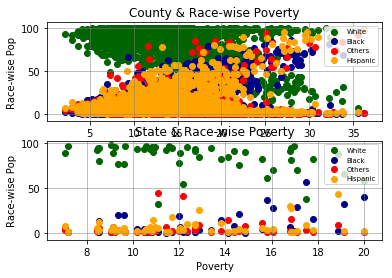

In [44]:
if __name__ == '__main__':
    demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops  = read_dataframes()
    birth_death_ratio(demographics, birth_death_measure)

In [45]:
def population_poverty(df):
    
    df1 = df[["CHSI_State_Name", "Poverty", "Population_Size"]]
    df1 = df1[df1["Poverty"]>=0]
    df_2 = df1.groupby(["CHSI_State_Name"], as_index=False).agg({"Population_Size":"mean", "Poverty":"mean"})
    df_2["Pop_Poverty_ratio"] = df_2["Population_Size"]/df_2["Poverty"]
    df_2 = df_2.sort_values(by=["Pop_Poverty_ratio"], ascending=True)
    print(df_2.round(2).head())

In [46]:
if __name__ == '__main__':
    demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops  = read_dataframes()
    population_poverty(demographics)

   CHSI_State_Name  Population_Size  Poverty  Pop_Poverty_ratio
41    South Dakota         11756.56    14.13             832.28
34    North Dakota         12012.77    11.43            1050.97
26         Montana         16708.39    14.84            1125.96
24     Mississippi         35623.02    19.99            1781.91
27        Nebraska         18911.69    10.56            1790.30


In [33]:
def death_factors(df1, df2):

    df = df1[["CHSI_State_Name", "White", "Black", "Native_American", "Asian", "Hispanic"]]
    df_2 = df2[["CHSI_State_Name","Total_Deaths"]]
    df_1 = df.copy()
    df_3 = df_2.copy()
    df_1["Others"] = df_1['Native_American']+df_1['Asian']
    df_1 = df_1.drop(["Native_American", "Asian"], axis=1)
    population = df_1.groupby(["CHSI_State_Name"], as_index=False).agg({"Black":"mean", "White":"mean", "Others":"mean", "Hispanic":"mean"})
    population = population.round(2)
    deaths = df_2.groupby(["CHSI_State_Name"], as_index=False).agg({"Total_Deaths":"mean"})
    deaths = deaths.round(0)
    pop_deaths = pd.merge(population, deaths, on="CHSI_State_Name")
    pop_deaths = pop_deaths.sort_values(by=["Total_Deaths"], ascending=False)
    first_20 = pop_deaths.head(10)
    last_20 = pop_deaths.tail(10)
    print(first_20)

    p1 = plt.bar(first_20["CHSI_State_Name"], first_20["White"], width=1, color="DarkGreen", edgecolor="black", label="White")
    p2 = plt.bar(first_20["CHSI_State_Name"], first_20["Black"], width=1, bottom=first_20["White"], color="Blue", edgecolor="black", label="Black")
    p3 = plt.bar(first_20["CHSI_State_Name"], first_20["Others"], width=1, bottom=np.array(first_20["White"]) + np.array(first_20["Black"]),
                 color="Red", edgecolor="black", label="Others")
    p4 = plt.bar(first_20["CHSI_State_Name"], first_20["Hispanic"], width=1,
                 bottom=np.array(first_20["White"]) + np.array(first_20["Black"]) + np.array(first_20["Others"]),
                 color="Orange", edgecolor="black", label="Hispanic")

    r1 = plt.bar(last_20["CHSI_State_Name"], last_20["White"], width=1, color="DarkGreen", edgecolor="black")
    r2 = plt.bar(last_20["CHSI_State_Name"], last_20["Black"], width=1, bottom=last_20["White"], color="Blue", edgecolor="black")
    r3 = plt.bar(last_20["CHSI_State_Name"], last_20["Others"], width=1,
                 bottom=np.array(last_20["White"]) + np.array(last_20["Black"]),
                 color="Red", edgecolor="black")
    r4 = plt.bar(last_20["CHSI_State_Name"], last_20["Hispanic"], width=1,
                 bottom=np.array(last_20["White"]) + np.array(last_20["Black"]) + np.array(last_20["Others"]),
                 color="Orange", edgecolor="black")

    plt.xlabel("Top & Last 10 States")
    plt.ylabel("Race-wise Pop percent")
    plt.legend(loc="upper right", fontsize="x-small")
    plt.xticks(rotation="vertical")
    plt.grid(linewidth=0.5, color = "grey")
    plt.title("Top 10 & last 10 states ")
    plt.show()

         CHSI_State_Name  Black  White  Others  Hispanic  Total_Deaths
8   District of Columbia  57.00  38.00    3.50      8.40       17375.0
4             California   3.63  85.09    8.92     25.20       12583.0
21         Massachusetts   6.03  89.23    3.56      6.11       12337.0
6            Connecticut   6.80  88.80    3.05      7.66       11197.0
30            New Jersey  12.85  80.08    5.89     12.67       10869.0
2                Arizona   1.89  81.09   15.95     27.88        8965.0
32              New York   6.56  89.66    2.80      5.78        8317.0
9                Florida  14.37  82.72    1.96     10.47        8121.0
7               Delaware  19.53  76.50    2.63      5.37        7014.0
39          Rhode Island   3.30  92.86    2.60      4.96        6557.0


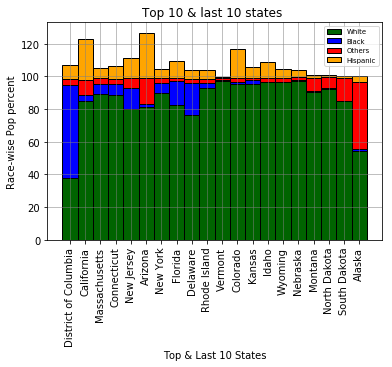

In [34]:
if __name__ == '__main__':
    demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops  = read_dataframes()
    death_factors(demographics, birth_death_measure)

In [48]:
def merge_dataframes(dataframe1, dataframe2, dataframe3, dataframe4):
   
    df_demo = dataframe2[["CHSI_County_Name","CHSI_State_Name","Poverty","Population_Size"]]
    df_riskfactor = dataframe1[["CHSI_County_Name","CHSI_State_Name","No_Exercise","Obesity","High_Blood_Pres","Smoker","Diabetes","Uninsured","Elderly_Medicare","Disabled_Medicare","Prim_Care_Phys_Rate"]]
    df_measurebd = dataframe3[["State_FIPS_Code","County_FIPS_Code","CHSI_County_Name","CHSI_State_Name","Late_Care","Infant_Mortality","Total_Deaths","Total_Births"]]
    df_unemp = dataframe4[["State_FIPS_Code","County_FIPS_Code","CHSI_County_Name","CHSI_State_Name","Unemployed"]]
    df_demo_risk = pd.merge(df_demo, df_riskfactor, on=['CHSI_State_Name','CHSI_County_Name'])
    df_demo_risk_bd = pd.merge(df_demo_risk, df_measurebd, on=['CHSI_State_Name','CHSI_County_Name'])
    df_demo_risk_bd_unemp = pd.merge (df_demo_risk_bd, df_unemp, on=['CHSI_State_Name','CHSI_County_Name'])

    pd.set_option('display.max_columns', None)

    return df_demo_risk_bd_unemp

In [49]:
def analysis_1 (df):
   
    df_final_1 = df.replace([-1111, -1111.1, -1, -2222.2, -2222, -2], 0)
    df_final_1 = df_final_1.groupby(['CHSI_State_Name'], as_index = False)["No_Exercise", "Obesity", "Poverty", "High_Blood_Pres", "Smoker", "Diabetes", "Total_Deaths", "Total_Births"].mean()
    df = df_final_1.loc[(df_final_1 != 0).any(axis=1)]
    print(df.isnull().sum())

    pd.set_option('display.max_columns', None)

    b = (df.sort_values(by=["Poverty","Total_Deaths"], ascending=False).head(20))
    b = b.round(2)
    print (b.head())
    print(b.tail())

In [36]:
if __name__ == '__main__':
    demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops  = read_dataframes()
    result = merge_dataframes(risk_factors, demographics, birth_death_measure, vulnerable_pops)
    analysis_1(result)

CHSI_State_Name    0
No_Exercise        0
Obesity            0
Poverty            0
High_Blood_Pres    0
Smoker             0
Diabetes           0
Total_Deaths       0
Total_Births       0
dtype: int64
         CHSI_State_Name  No_Exercise  Obesity  Poverty  High_Blood_Pres  \
24           Mississippi        27.18    23.49    19.99            12.40   
18             Louisiana        30.49    24.66    19.13            18.02   
31            New Mexico        23.43    20.28    18.88            16.32   
3               Arkansas        26.68    22.65    17.79            12.29   
8   District of Columbia        22.20    21.30    17.50            26.70   

    Smoker  Diabetes  Total_Deaths  Total_Births  
24   21.41      9.72       2070.85       2981.57  
18   22.33      8.70       2922.33       4446.41  
31   19.96      6.99       1961.48       3604.24  
3    23.74      8.07       2290.09       2790.69  
8    20.40      7.80      17375.00      22742.00  
   CHSI_State_Name  No_Exercise  Ob

In [50]:
def analysis_2 (df):
   
    df_final_2 = df.replace([-1111, -1111.1, -1, -2222.2, -2222, -2], 0)
    df_final_2 = df_final_2.groupby(['CHSI_State_Name'], as_index = False)["Unemployed","Uninsured", "Elderly_Medicare", "Disabled_Medicare", "Prim_Care_Phys_Rate", "Late_Care", "Infant_Mortality","Total_Deaths","Poverty"].mean()
    df_final_2 = df_final_2.loc[(df_final_2 != 0).any(axis=1)]

    pd.set_option('display.max_columns', None)

    c = (df_final_2.sort_values(by=["Poverty", "Total_Deaths"], ascending=False).head(20))
    print(c.head())

In [52]:
if __name__ == '__main__':

    demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops  = read_dataframes()
    result = merge_dataframes(risk_factors, demographics, birth_death_measure, vulnerable_pops)
    analysis_2(result)

         CHSI_State_Name    Unemployed     Uninsured  Elderly_Medicare  \
24           Mississippi   1292.890244   5856.512195       4091.609756   
18             Louisiana    500.609375  11561.031250       7870.171875   
31            New Mexico   1489.818182  12929.424242       6393.272727   
3               Arkansas    886.720000   5683.586667       4830.213333   
8   District of Columbia  19159.000000      0.000000      63403.000000   

    Disabled_Medicare  Prim_Care_Phys_Rate  Late_Care  Infant_Mortality  \
24        1233.073171            45.264634  19.059756         10.446341   
18        1818.359375            52.959375  18.350000          9.168750   
31        1180.939394            57.003030  31.803030          5.321212   
3         1202.893333            52.068000  22.706667          8.622667   
8        10262.000000           227.600000  24.300000         10.900000   

    Total_Deaths    Poverty  
24   2070.853659  19.991463  
18   2922.328125  19.129687  
31   1961.4848

In [53]:
def genetic_deaths(df1,df2):
    
    df = pd.merge(df1,df2, on = ["CHSI_County_Name","County_FIPS_Code","CHSI_State_Name","State_FIPS_Code"])
    df_1 = df[['CHSI_State_Name', "A_Wh_BirthDef","A_Bl_BirthDef","A_Ot_BirthDef","A_Hi_BirthDef","Total_Births"]]
    df_1 = df_1.replace(to_replace=[-9999, -2222, -2222.2, -2, -1111.1, -1111, -1], value=0)
    df_1 = df_1.groupby("CHSI_State_Name")["A_Wh_BirthDef", "A_Bl_BirthDef", "A_Ot_BirthDef", "A_Hi_BirthDef", "Total_Births"].sum()
    df_1.reset_index()
    pd.set_option('display.max_columns', None)
    print(df_1.head())

In [40]:
if __name__ == '__main__':

    demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops  = read_dataframes()
    genetic_deaths(lead_death_cause, birth_death_measure)

                 A_Wh_BirthDef  A_Bl_BirthDef  A_Ot_BirthDef  A_Hi_BirthDef  \
CHSI_State_Name                                                               
Alabama                    611            273              0              0   
Alaska                     120              0             70              0   
Arizona                    208             10             66            101   
Arkansas                   416             41              0              0   
California                 874            174            308            705   

                 Total_Births  
CHSI_State_Name                
Alabama              268970.0  
Alaska                54468.0  
Arizona              280462.0  
Arkansas             209302.0  
California          1624033.0  


# This main function is used to display the result of all the functions used simultaneously.

       CHSI_County_Name CHSI_State_Name  White  Black  Hispanic  Poverty  \
2732              Starr           Texas   98.6    0.5      97.5     36.2   
2413            Shannon    South Dakota    6.7    0.3       2.3     35.6   
1126       East Carroll       Louisiana   31.1   68.2       1.3     33.9   
2417               Todd    South Dakota   15.0    0.2       2.6     33.7   
2423            Ziebach    South Dakota   25.5    0.0       1.1     33.0   
2772             Zavala           Texas   97.4    1.0      91.3     32.7   
3012           McDowell   West Virginia   88.7   10.6       0.5     32.4   
1422             Holmes     Mississippi   18.7   80.7       0.9     32.2   
1083             Owsley        Kentucky   99.5    0.1       0.7     31.9   
2626            Hidalgo           Texas   97.4    0.9      89.2     31.0   
1808           McKinley      New Mexico   20.6    0.6      11.3     30.6   
1463          Sunflower     Mississippi   26.9   72.3       1.7     30.3   
1014        

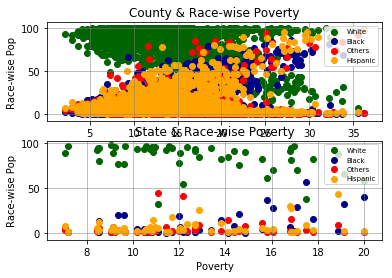

         CHSI_State_Name  Population_Size  Poverty  Pop_Poverty_ratio
41          South Dakota         11756.56    14.13             832.28
34          North Dakota         12012.77    11.43            1050.97
26               Montana         16708.39    14.84            1125.96
24           Mississippi         35623.02    19.99            1781.91
27              Nebraska         18911.69    10.56            1790.30
48         West Virginia         33033.75    16.98            1945.45
1                 Alaska         24580.04    12.14            2023.97
50               Wyoming         22143.22    10.83            2043.72
17              Kentucky         34778.38    16.85            2064.10
3               Arkansas         37055.39    17.79            2082.54
16                Kansas         26139.88    10.95            2388.14
12                 Idaho         32479.45    12.35            2628.95
36              Oklahoma         46076.42    15.57            2958.79
31            New Me

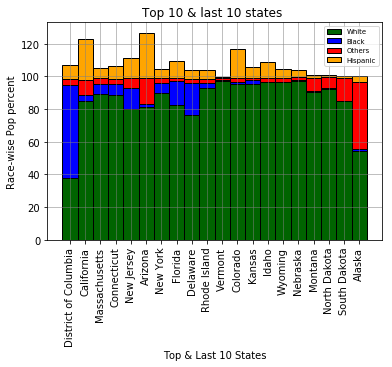

CHSI_State_Name    0
No_Exercise        0
Obesity            0
Poverty            0
High_Blood_Pres    0
Smoker             0
Diabetes           0
Total_Deaths       0
Total_Births       0
dtype: int64
         CHSI_State_Name  No_Exercise  Obesity  Poverty  High_Blood_Pres  \
24           Mississippi        27.18    23.49    19.99            12.40   
18             Louisiana        30.49    24.66    19.13            18.02   
31            New Mexico        23.43    20.28    18.88            16.32   
3               Arkansas        26.68    22.65    17.79            12.29   
8   District of Columbia        22.20    21.30    17.50            26.70   

    Smoker  Diabetes  Total_Deaths  Total_Births  
24   21.41      9.72       2070.85       2981.57  
18   22.33      8.70       2922.33       4446.41  
31   19.96      6.99       1961.48       3604.24  
3    23.74      8.07       2290.09       2790.69  
8    20.40      7.80      17375.00      22742.00  
   CHSI_State_Name  No_Exercise  Ob

In [24]:
if __name__ == '__main__':

    demographics, lead_death_cause, birth_death_measure, risk_factors, vulnerable_pops  = read_dataframes()
    birth_death_ratio(demographics, birth_death_measure)
    population_poverty(demographics)
    death_factors(demographics, birth_death_measure)
    result = merge_dataframes(risk_factors, demographics, birth_death_measure, vulnerable_pops)
    analysis_1(result)
    analysis_2(result)
    genetic_deaths(lead_death_cause, birth_death_measure)